In [18]:
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.core.series import Series
from scipy.stats import chisquare, chi2
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.cluster import KMeans
import sys

sys.path.append("../")

from fast_food_nutrition.etl import FastFoodMenuETL
from fast_food_nutrition.model import COLOR, FoodIntakeType, FoodNutritionFeatures, FoodNutritionMapping, Nutrition, Sex
from fast_food_nutrition.viz import FastFoodNutritionVisualizer

In [19]:
etl = FastFoodMenuETL()
menu = etl.load_menu_items()
menu.describe()

,calories,fat,carbohydrates,fiber,protein
count,1117.000000,1117.000000,1117.000000,1117.000000,1117.000000
mean,341.264100,14.354969,61.120859,1.844226,13.001611
std,437.434844,27.606401,69.729333,3.961610,20.081804
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,140.000000,1.000000,24.000000,0.000000,3.000000
50%,270.000000,7.000000,41.000000,1.000000,9.000000
75%,450.000000,21.000000,65.000000,2.000000,18.000000
max,9850.000000,624.000000,616.000000,63.000000,442.000000


In [20]:
menu.dtypes

menu_item        string[python]
calories                float64
fat                     float64
carbohydrates           float64
fiber                   float64
protein                 float64
dtype: object

In [4]:
menu

,menu_item,calories,fat,carbohydrates,fiber,protein
0,Cool Lime Starbucks Refreshers™ Beverage,45.0,0.0,11.0,0.0,0.0
1,Strawberry Acai Starbucks Refreshers™ Beverage,80.0,0.0,18.0,1.0,0.0
2,Very Berry Hibiscus Starbucks Refreshers™ Beve...,60.0,0.0,14.0,1.0,0.0
3,Evolution Fresh™ Organic Ginger Limeade,110.0,0.0,28.0,0.0,0.0
4,Iced Coffee,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
1112,Crispy Bell Peppers,80.0,6.0,6.0,0.0,1.0
1113,Harvest Nut Granola,70.0,2.0,10.0,0.0,1.0
1114,Seasoned Tortilla Strips,70.0,4.0,8.0,1.0,1.0
1115,Lemon Parmesan Panko,0.0,0.0,0.0,0.0,0.0


In [22]:
len(menu['menu_item'].unique())

991

In [23]:
menu = menu.drop_duplicates(keep='last')

In [24]:
len(menu)

1096

In [25]:
duplicate_menu_items = menu.duplicated(subset='menu_item', keep=False)
for _, item in menu[duplicate_menu_items].iterrows():
    print(item['menu_item'])

Iced Coffee
Iced Coffee
Chocolate Chip Cookie
Caffè Latte 2% Milk
Caffè Latte Soymilk
Caffè Latte 2% Milk
Caffè Latte Soymilk
Caffè Latte 2% Milk
Caffè Latte Soymilk
Caffè Latte 2% Milk
Caffè Latte Soymilk
Caffè Mocha (Without Whipped Cream) 2% Milk
Caffè Mocha (Without Whipped Cream) Soymilk
Caffè Mocha (Without Whipped Cream) 2% Milk
Caffè Mocha (Without Whipped Cream) Soymilk
Caffè Mocha (Without Whipped Cream) 2% Milk
Caffè Mocha (Without Whipped Cream) Soymilk
Caffè Mocha (Without Whipped Cream) 2% Milk
Caffè Mocha (Without Whipped Cream) Soymilk
Vanilla Latte (Or Other Flavoured Latte) 2% Milk
Vanilla Latte (Or Other Flavoured Latte) Soymilk
Vanilla Latte (Or Other Flavoured Latte) 2% Milk
Vanilla Latte (Or Other Flavoured Latte) Soymilk
Vanilla Latte (Or Other Flavoured Latte) 2% Milk
Vanilla Latte (Or Other Flavoured Latte) Soymilk
Vanilla Latte (Or Other Flavoured Latte) 2% Milk
Vanilla Latte (Or Other Flavoured Latte) Soymilk
Cappuccino 2% Milk
Cappuccino Soymilk
Cappuccino 2

In [26]:
menu.set_index('menu_item', inplace=True)

In [27]:
len(menu)

1096

## Scatterplots

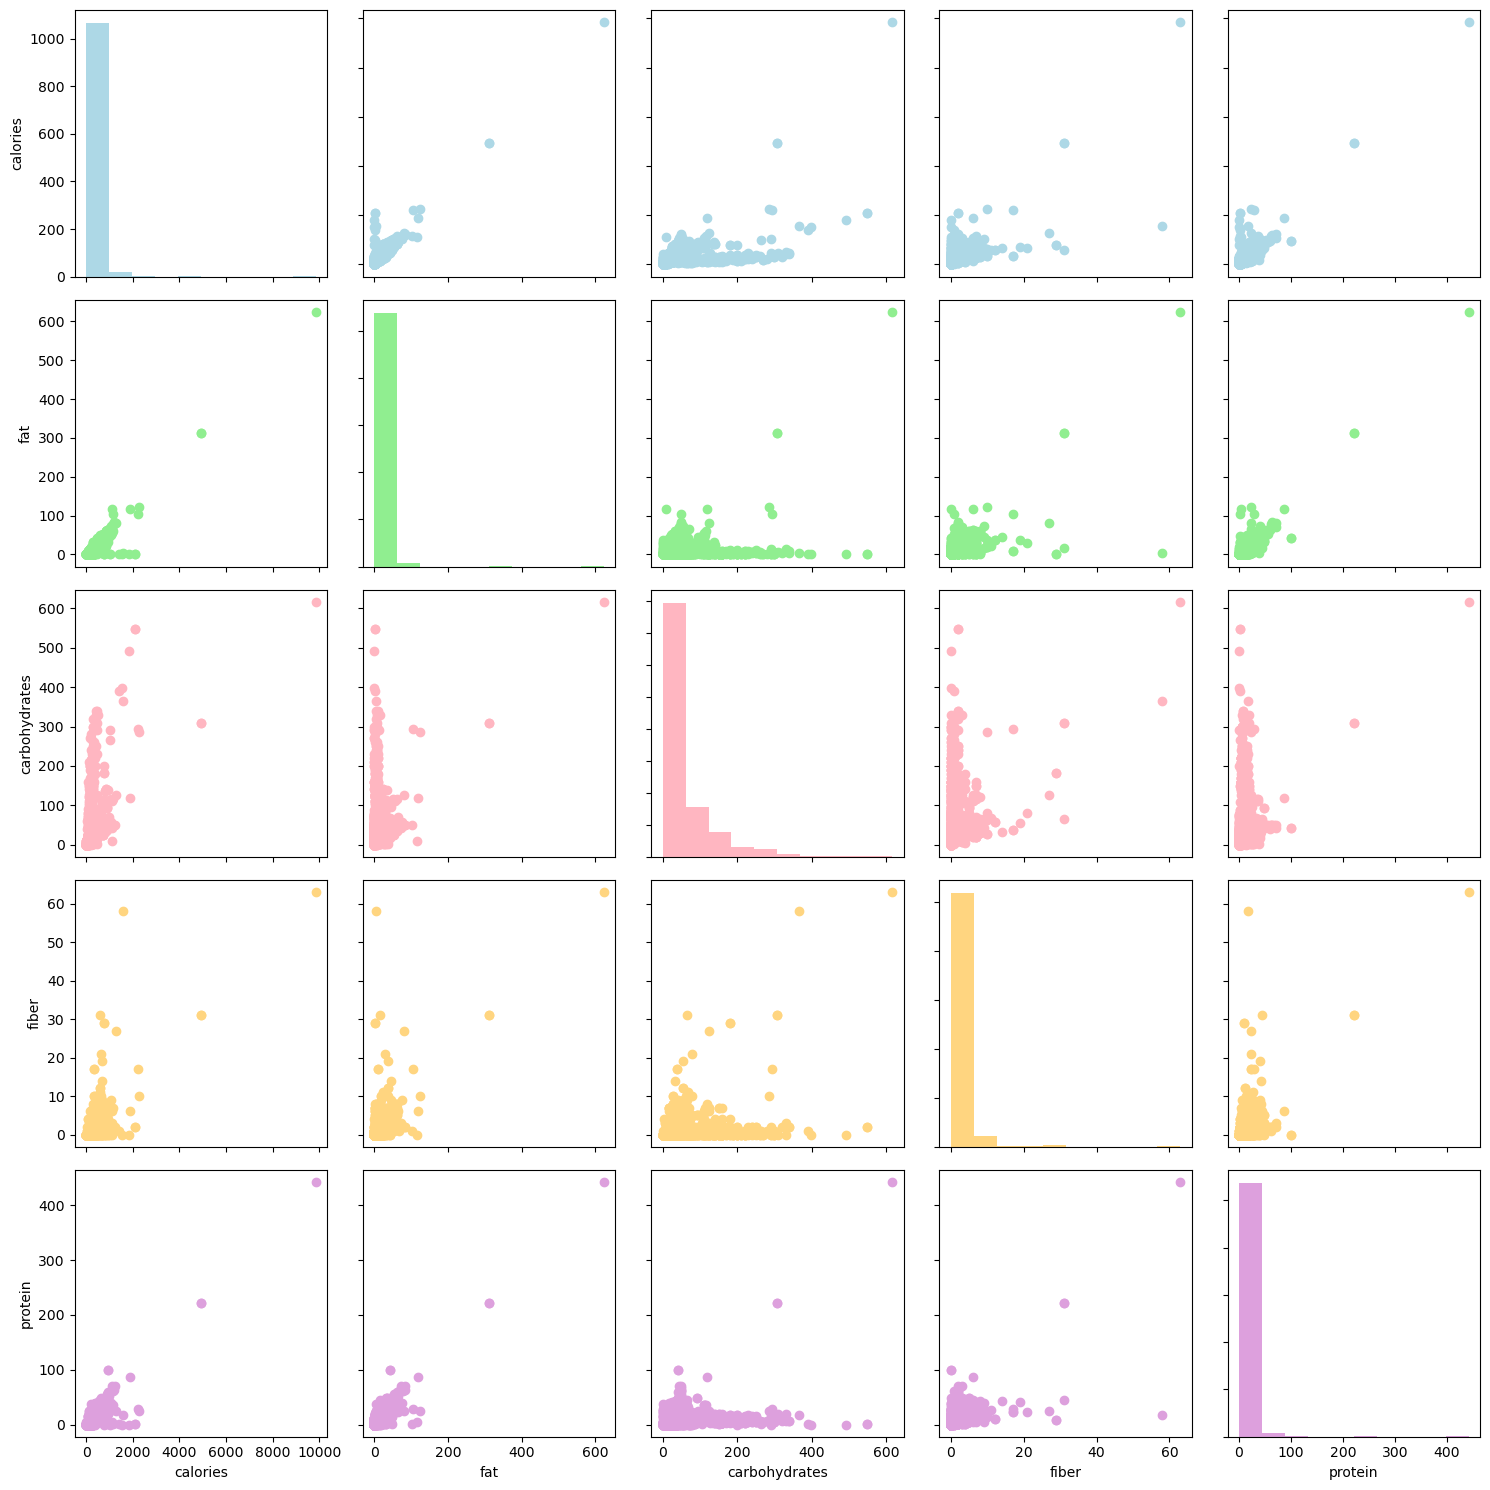

In [11]:
FastFoodNutritionVisualizer.generate_scatter_plots(menu)

In [12]:
## Boxplots

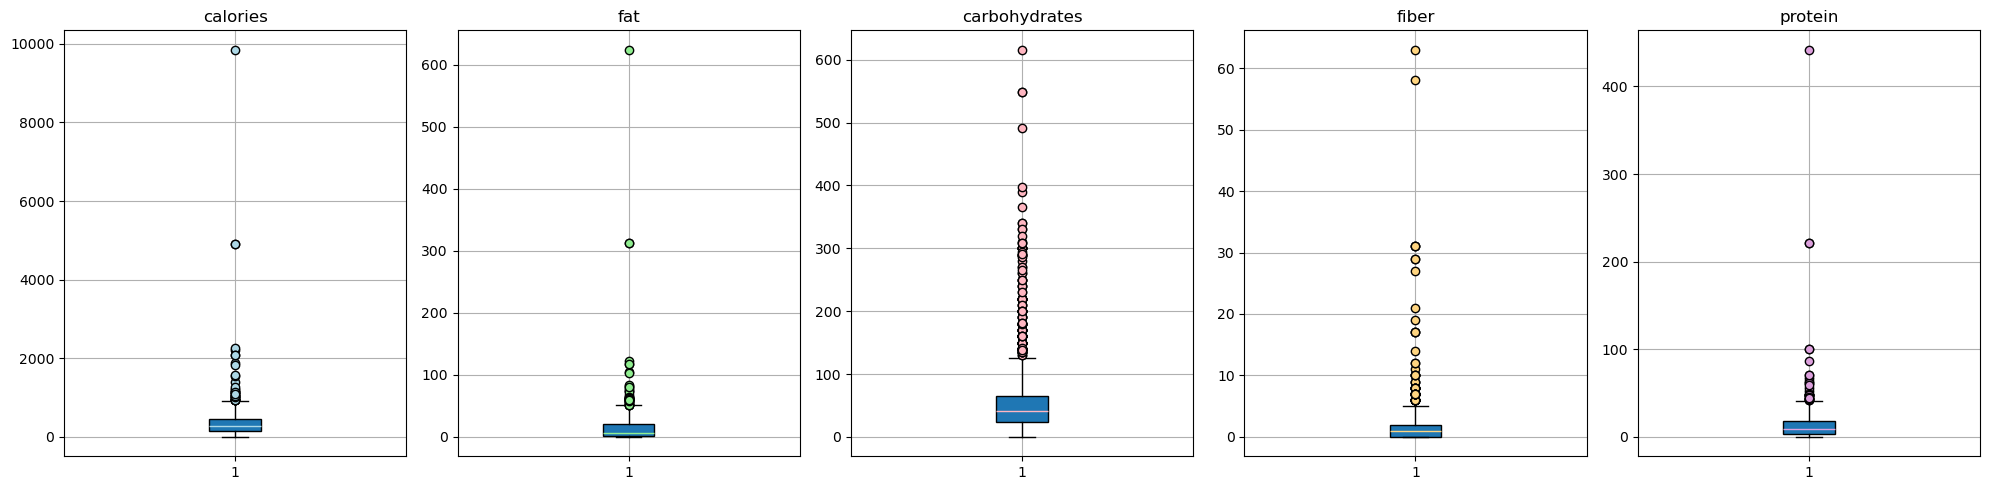

In [13]:
FastFoodNutritionVisualizer.generate_box_plot(menu)

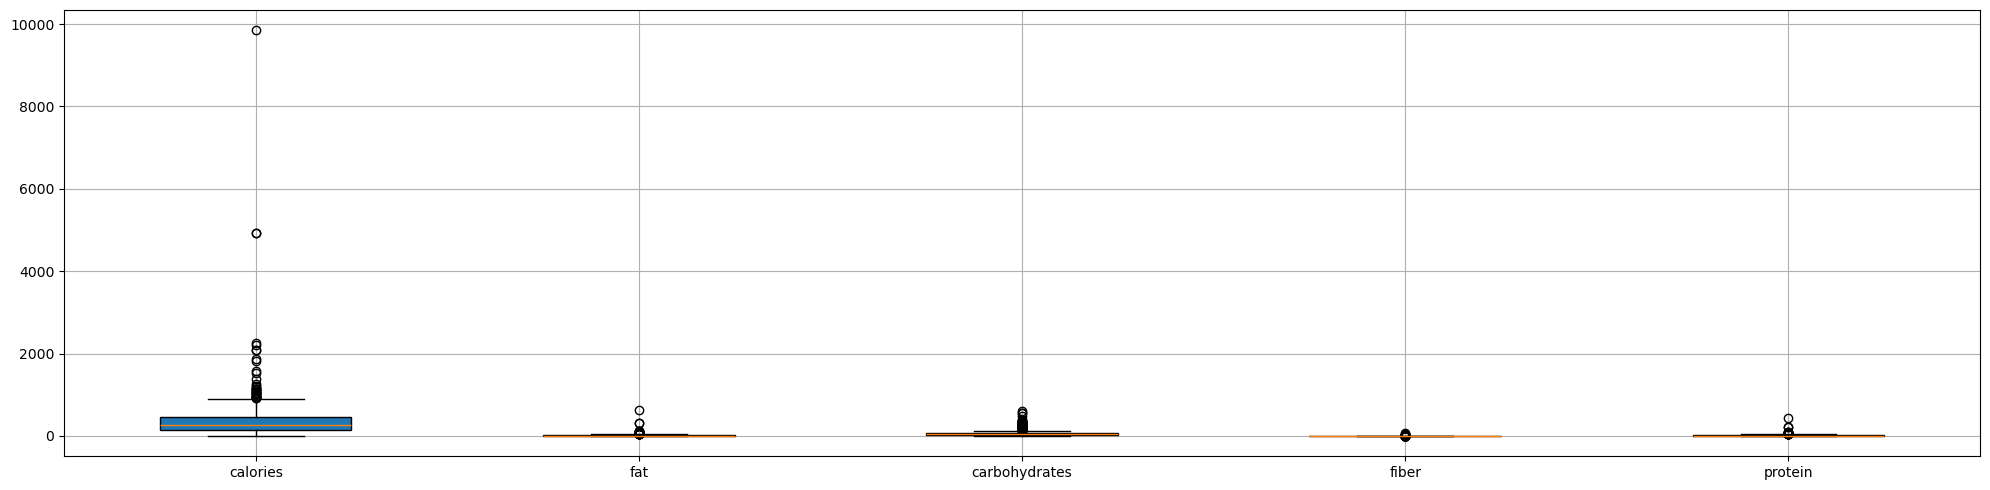

In [14]:
FastFoodNutritionVisualizer.generate_box_plot(menu, merge=True)

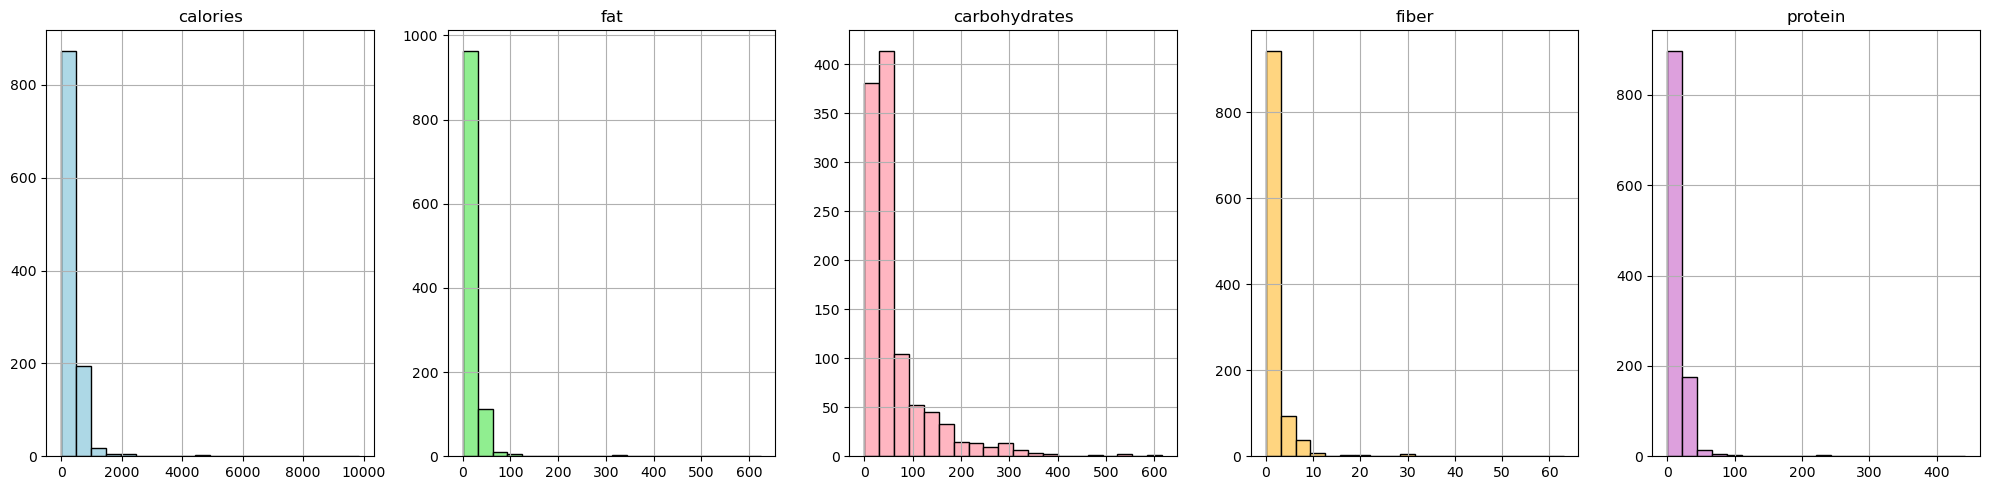

In [15]:
FastFoodNutritionVisualizer.generate_histogram_plots(menu)

In [41]:
menu_scaled.shape

(1096, 5)

In [51]:
menu

,calories,fat,carbohydrates,fiber,protein
menu_item,,,,,
Cool Lime Starbucks Refreshers™ Beverage,45.0,0.0,11.0,0.0,0.0
Strawberry Acai Starbucks Refreshers™ Beverage,80.0,0.0,18.0,1.0,0.0
Very Berry Hibiscus Starbucks Refreshers™ Beverage,60.0,0.0,14.0,1.0,0.0
Evolution Fresh™ Organic Ginger Limeade,110.0,0.0,28.0,0.0,0.0
Iced Coffee,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
Crispy Bell Peppers,80.0,6.0,6.0,0.0,1.0
Harvest Nut Granola,70.0,2.0,10.0,0.0,1.0
Seasoned Tortilla Strips,70.0,4.0,8.0,1.0,1.0


In [57]:
scaler = MinMaxScaler()

# Select the 'calories' column from the menu DataFrame. 
# The values need to be in the form of a 2D array for the scaler, hence the double brackets.
calories = menu[['calories']]

# Scale the 'calories' column
calories_scaled = scaler.fit_transform(calories)

# The result is a 2D numpy array. If you want to add this back into your DataFrame:
menu['calories_scaled'] = calories_scaled.flatten()

In [59]:
calories_scaled

array([[0.00456853],
       [0.00812183],
       [0.00609137],
       ...,
       [0.0071066 ],
       [0.        ],
       [0.00253807]])

In [47]:
menu_scaled

array([[0.00456853, 0.        , 0.01785714, 0.        , 0.        ],
       [0.00812183, 0.        , 0.02922078, 0.01587302, 0.        ],
       [0.00609137, 0.        , 0.02272727, 0.01587302, 0.        ],
       ...,
       [0.0071066 , 0.00641026, 0.01298701, 0.01587302, 0.00226244],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.00253807, 0.00080128, 0.00811688, 0.        , 0.        ]])

In [77]:
# Bin the data into 10 equal-sized bins
observed_frequencies, bins = np.histogram(calories, bins=3)

# Expected frequencies assuming a uniform distribution
expected_frequencies = np.array([len(calories) / 10] * 10)

# Perform the chi-square goodness-of-fit test
chi_stat, p_value = chisquare(observed_frequencies, f_exp=expected_frequencies)

print(f"Chi-squared Statistic: {chi_stat}, P-value: {p_value}")

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (3,) and arg 1 with shape (10,).

In [81]:
# Bin the data into 3 equal-sized bins
observed_frequencies, bins = np.histogram(calories_scaled, bins=5)

# Expected frequencies assuming a uniform distribution across the 3 bins
expected_frequencies = np.array([len(calories_scaled) / 5] * 5)

# Perform the chi-square goodness-of-fit test
chi_stat, p_value = chisquare(observed_frequencies, f_exp=expected_frequencies)

print(f"Chi-squared Statistic: {chi_stat}, P-value: {p_value}")

Chi-squared Statistic: 4314.319343065693, P-value: 0.0


In [80]:
observed_frequencies

array([1093,    2,    1])

In [70]:
expected_frequencies

array([8.69905325e-07, 6.70258429e-05, 4.91951805e-04, 1.79771142e-03,
       4.67286389e-03, 9.91902785e-03, 1.84058998e-02, 3.10337285e-02,
       4.87023460e-02, 7.22859472e-02])

In [34]:
menu_scaled

array([[0.00456853, 0.        , 0.01785714, 0.        , 0.        ],
       [0.00812183, 0.        , 0.02922078, 0.01587302, 0.        ],
       [0.00609137, 0.        , 0.02272727, 0.01587302, 0.        ],
       ...,
       [0.0071066 , 0.00641026, 0.01298701, 0.01587302, 0.00226244],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.00253807, 0.00080128, 0.00811688, 0.        , 0.        ]])